In [101]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import io
from skimage.transform import resize

# Multimodal Arquitecture

In [2]:
data_dir = "/home/daielchom/Documents/projects/maestria/data/datasets/leaf_classification/"

In [3]:
os.listdir(data_dir)

['test.csv', 'images', 'train.csv']

In [6]:
data = pd.read_csv(data_dir+"/train.csv")
images = {i:io.imread(data_dir+"/images/"+str(i)+".jpg") for i in data.id.values}

In [7]:
data.shape, len(images)

((990, 194), 990)

## split data

In [35]:
split = 0.7
sample = lambda x:x.id.sample(frac=split).values.tolist()
train_ids = data.groupby("species").apply(sample).values.tolist()
train_ids = np.array(train_ids).flatten()
train_ids = train_ids[train_ids.argsort()]

### split features

In [36]:
get_test_ids = lambda x:x not in train_ids
test_ids = data[data.id.apply(get_test_ids)].id.sort_values().values

In [37]:
train_ids.shape, test_ids.shape

((693,), (297,))

In [38]:
train_features = data[data.id.isin(train_ids)]
test_features = data[data.id.isin(test_ids)]

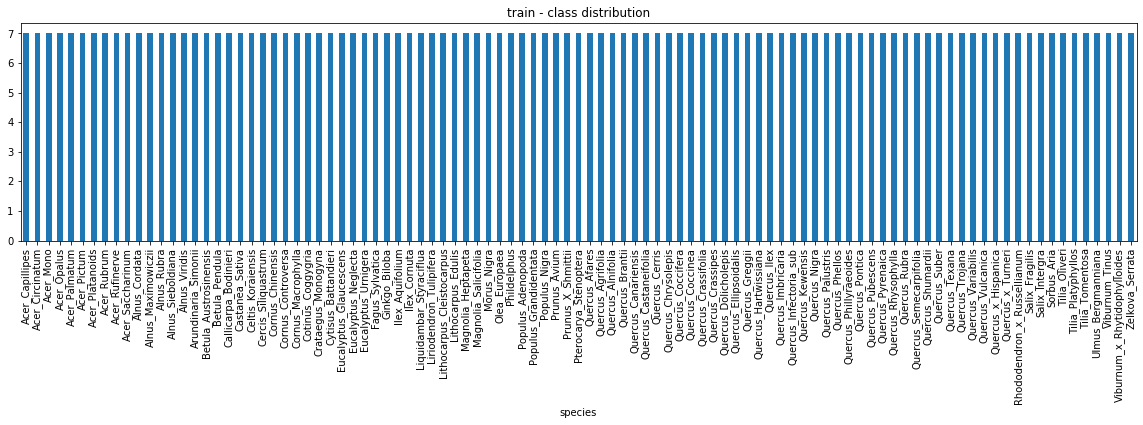

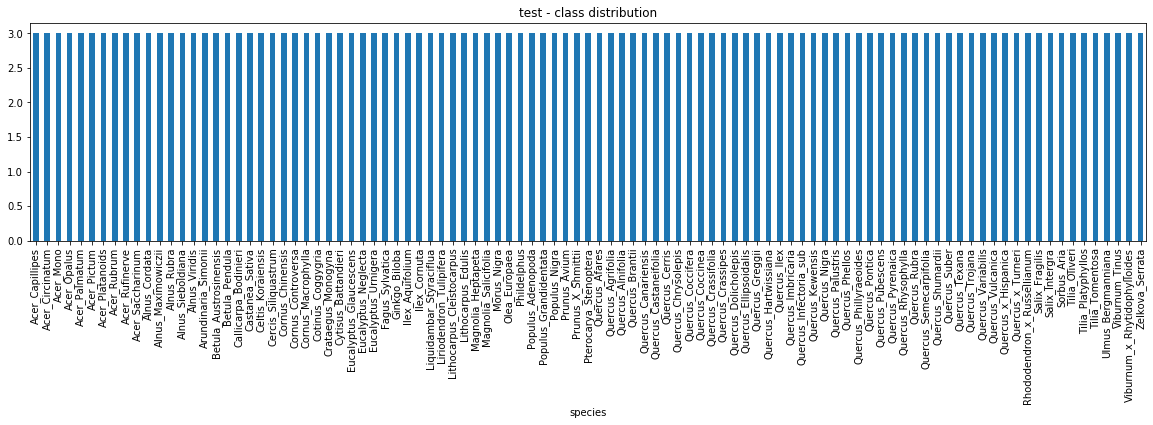

In [112]:
train_features.groupby("species").count().id.plot.bar(figsize=(20,4))
plt.title("train - class distribution")
plt.show()

test_features.groupby("species").count().id.plot.bar(figsize=(20,4))
plt.title("test - class distribution")
plt.show()

In [39]:
num_classes = data.species.value_counts().shape[0]
print("There are {} classes for the classification task.".format(num_classes))

There are 99 classes for the classification task.


In [40]:
species = data.species.value_counts().index.tolist()
species = {species[i]:i for i in range(len(species))}

In [41]:
set_target = lambda x:species[x]
train_features.loc[:, "target"] = train_features.species.apply(set_target).values
test_features.loc[:, "target"] = test_features.species.apply(set_target).values

In [42]:
_ = train_features.pop("species")
_ = test_features.pop("species")

### split images

In [52]:
train_images = {i:images[i] for i in images if i in train_ids}
test_images =  {i:images[i] for i in images if i in test_ids}

In [53]:
len(train_images), len(test_images)

(693, 297)

In [83]:
image_shapes = [train_images[i].shape for i in train_images] + [test_images[i].shape for i in test_images]
ids_shapes = [i for i in train_images] + [i for i in test_images]

len(image_shapes)

990

In [76]:
maxid = np.argmax([np.sum(i) for i in image_shapes])
minid = np.argmin([np.sum(i) for i in image_shapes])

In [91]:
maxid = ids_shapes[maxid]
minid = ids_shapes[minid]

In [99]:
big_image = train_images[maxid]
small_image = test_images[minid]

Text(0.5, 1.0, 'image shape: (264, 185)')

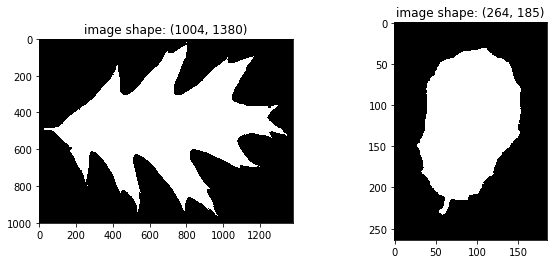

In [100]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(big_image, cmap="Greys_r")
plt.title("image shape: {}".format(big_image.shape))
plt.subplot(122)
plt.imshow(small_image, cmap="Greys_r")
plt.title("image shape: {}".format(small_image.shape))

Text(0.5, 1.0, 'image shape: (100, 100)')

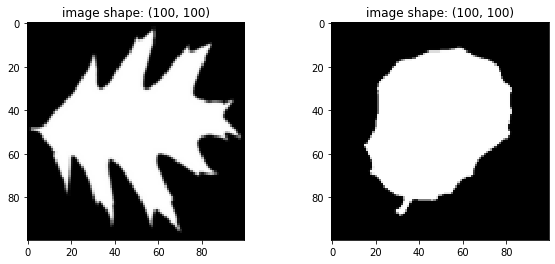

In [111]:
rbi = resize(big_image, (100, 100))
rsi = resize(small_image, (100, 100))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(rbi, cmap="Greys_r")
plt.title("image shape: {}".format(rbi.shape))
plt.subplot(122)
plt.imshow(rsi, cmap="Greys_r")
plt.title("image shape: {}".format(rsi.shape))

In [49]:
X_train_f = train_features[[i for i in train_features.columns if i not in ["target", "id"]]].values
y_train_f = train_features["target"].values

X_train_i

In [50]:
X_train_f.shape, y_train_f.shape

((693, 192), (693,))

In [58]:
np.array(list(train_images.values()))

array([array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
       array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 